In [ ]:
#Understand the data in order to predict who survived and who did not in the Titanic disaster.

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data=pd.read_csv('Train_T.csv')
test=pd.read_csv('Test_T.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()   #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

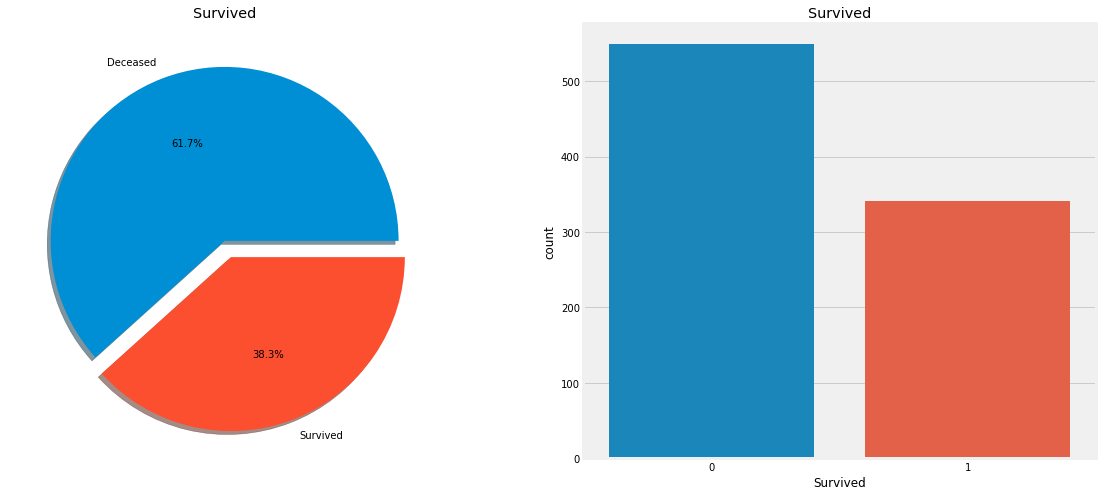

In [ ]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',
                            ax=ax[0],shadow=True,labels=['Deceased', 'Survived'])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           232
male    0           468
        1           109
Name: Survived, dtype: int64

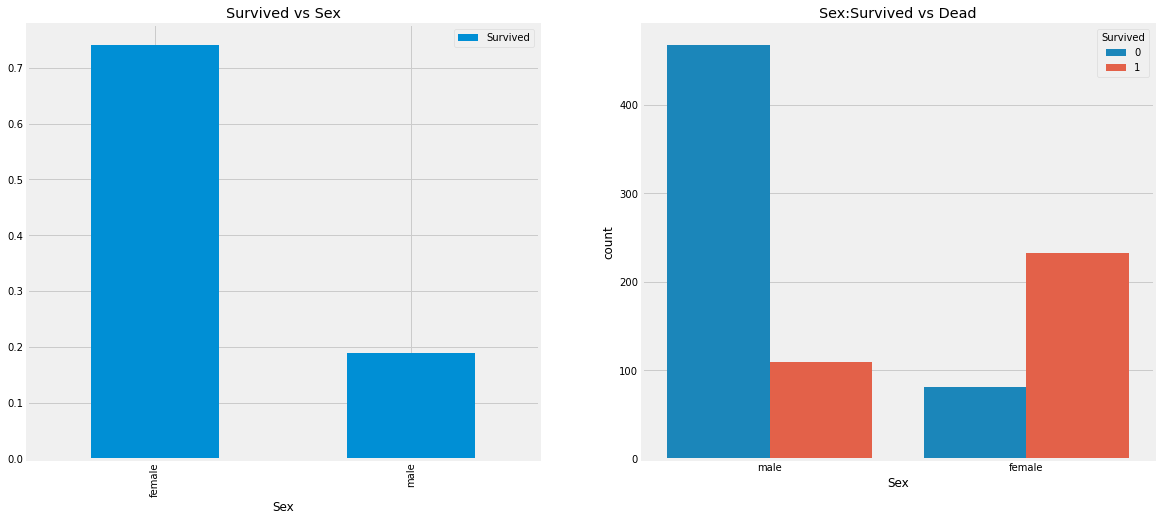

In [ ]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,86,183
3,372,119,491
All,549,341,890


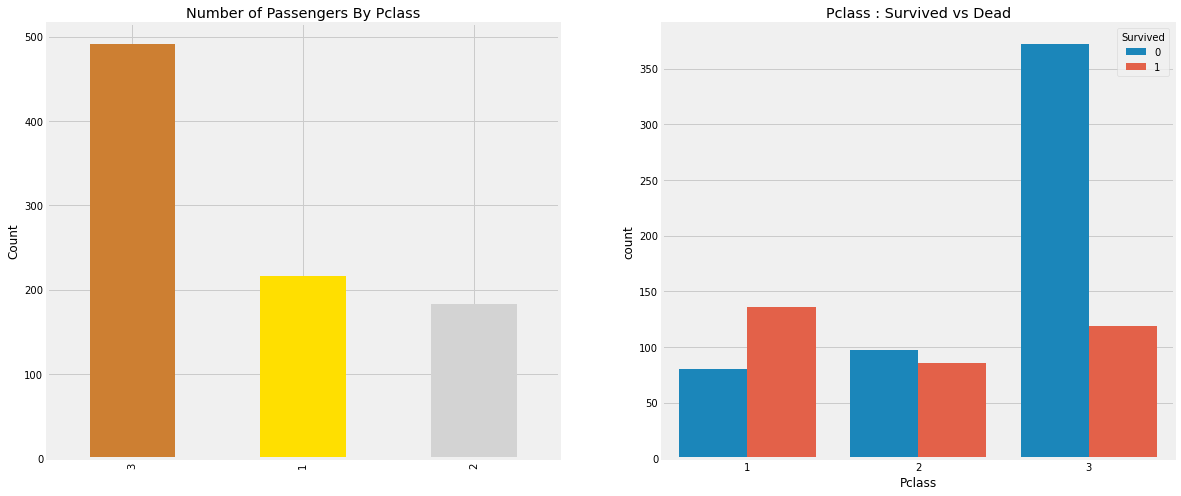

In [ ]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#ffdf00','#d3d3d3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

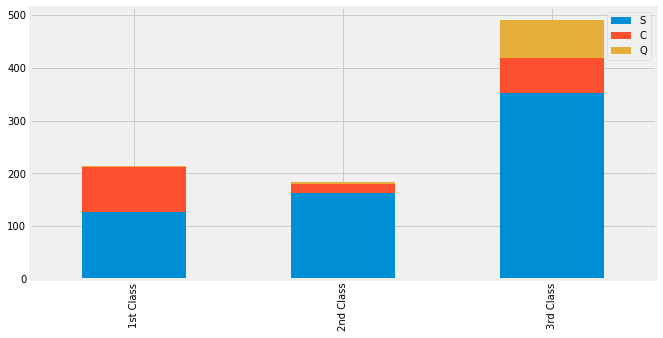

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    163
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [ ]:
Pclass1 = data[data['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = data[data['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = data[data['Pclass'] == 3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   69   72  232
male   0          77   91  300  468
       1          45   17   47  109
All              216  183  491  890

In [ ]:
print('Oldest Passenger was of :',data['Age'].max(),'Years')
print('Youngest Passenger was of :',data['Age'].min(),'Years')
print('Average Age of Passenger on Ship was :',data['Age'].mean(),'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of : 0.42 Years
Average Age of Passenger on Ship was : 29.69518934081346 Years


In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #Extract the salutations

In [ ]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.') #Extract the salutations

In [ ]:
# Checking the Initials with the Sex
pd.crosstab(data.Initial,data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,181,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer',
                         'Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other',
                         'Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer',
                         'Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other',
                         'Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
# Check the Average age by Initials
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.788591
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age']=46

In [ ]:
#check if any values is left
data.Age.isnull().any()

False

In [ ]:
test.loc[(test.Age.isnull()) & (test.Initial=='Mr'),'Age']=33
test.loc[(test.Age.isnull()) & (test.Initial=='Mrs'),'Age']=36
test.loc[(test.Age.isnull()) & (test.Initial=='Master'),'Age']=5
test.loc[(test.Age.isnull()) & (test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull()) & (test.Initial=='Other'),'Age']=46

In [ ]:
test.Age.isnull().any()

False

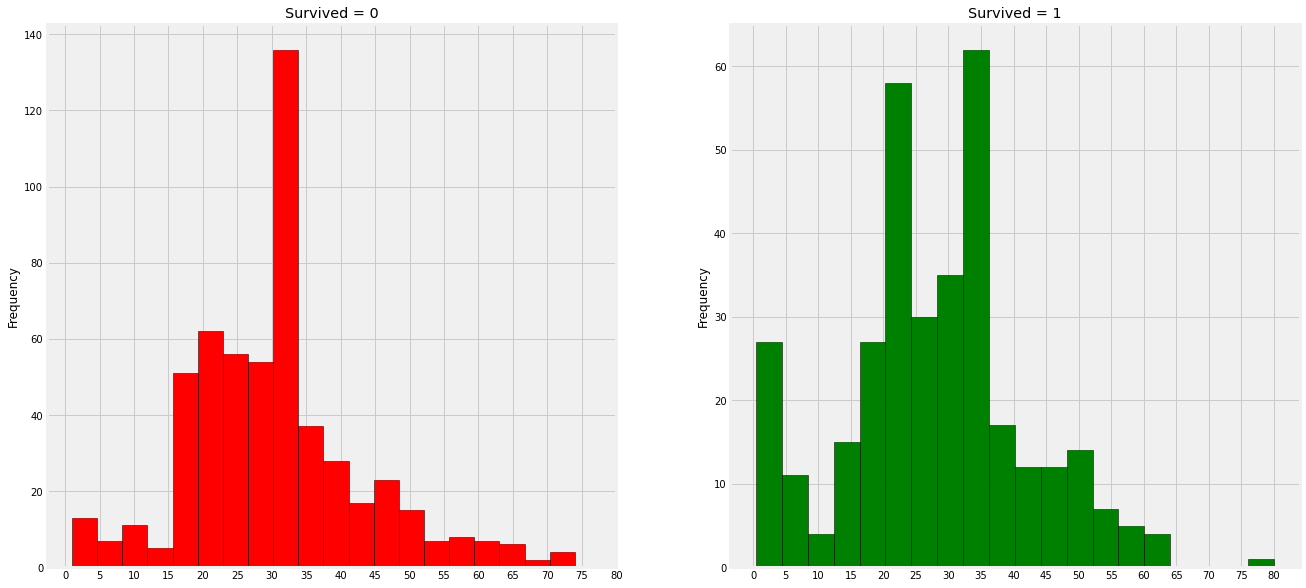

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,
                                        edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,
                                        edgecolor='black',color='green')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   60   82   15  163
         3          55   33  231   34  353
All                 81  230  468  109  888

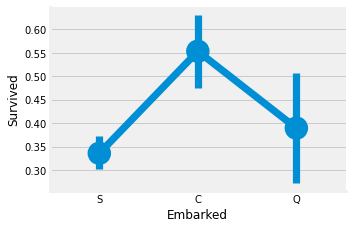

In [ ]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

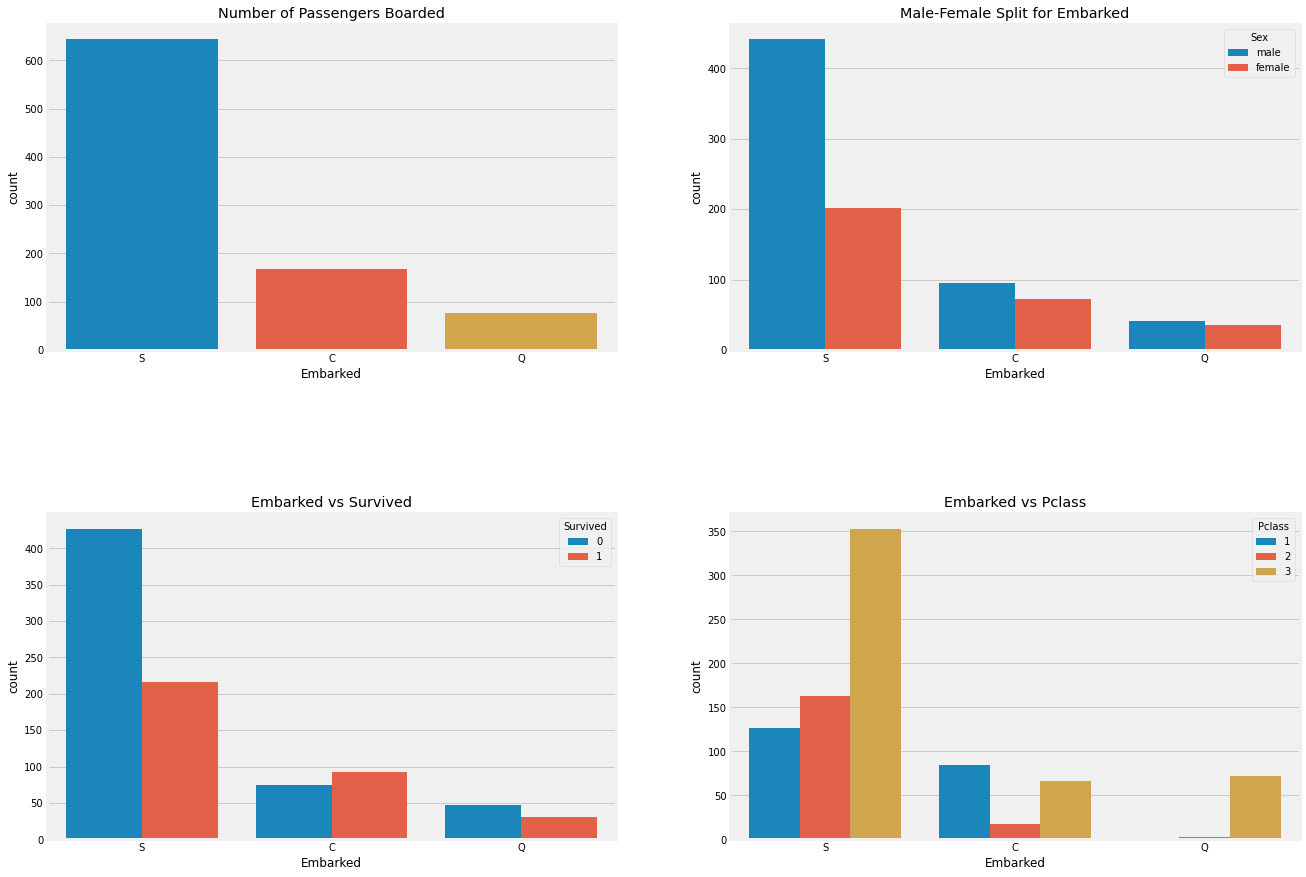

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('Number of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [ ]:
data['Embarked'].fillna('S',inplace=True)

In [ ]:
#Check if any NaN values
data.Embarked.isnull().any()

False

In [ ]:
pd.crosstab([data.SibSp],data.Survived)

Survived,0,1
SibSp,,
0,398,209
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [ ]:
pd.crosstab(data.SibSp,data.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,119,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [ ]:
pd.crosstab(data.Parch,data.Pclass)

Pclass,1,2,3
Parch,,,
0,163,133,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [ ]:
print('Highest Fare Was :', data['Fare'].max())
print('Lowest Fare Was :', data['Fare'].min())
print('Average Fare Was :', data['Fare'].mean())

Highest Fare Was : 512.3292
Lowest Fare Was : 0.0
Average Fare Was : 32.225785730337044


In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4  

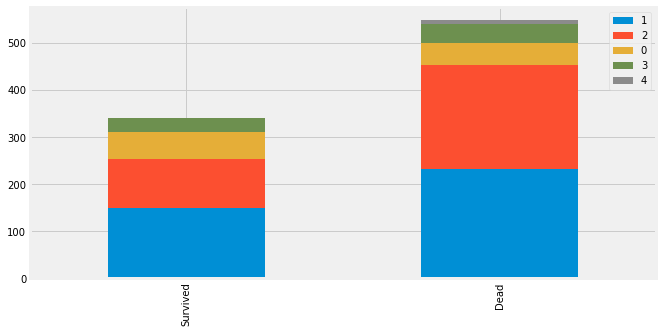

In [ ]:
data.head()
bar_chart('Age_band')

In [ ]:
# Check Number of Passengers in each band
data['Age_band'].value_counts().to_frame()

,Age_band
1,382
2,324
0,104
3,69
4,11


In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.903]",0.197309
"(7.903, 14.454]",0.300448
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
test.Fare = test.Fare.fillna(32)

In [ ]:
data['FamilySize'] = pd.DataFrame(data.SibSp + data.Parch)
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_band,FamilySize
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,446.361798,0.383146,2.308989,29.838955,0.523596,0.382022,32.225786,1.439326,0.905618
std,257.271723,0.486427,0.836477,13.288693,1.103224,0.806409,49.717193,0.842637,1.614080
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.250000,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100,1.000000,0.000000
50%,446.500000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,668.750000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,4.000000,10.000000


In [ ]:
test['FamilySize'] = pd.DataFrame(test.SibSp + test.Parch)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.242823,0.447368,0.392344,35.618511,0.839713
std,120.810458,0.841838,13.039264,0.896760,0.981429,55.840782,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,36.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000


In [ ]:
data= data.drop(['SibSp', 'Parch'], axis = 1)
test= test.drop(['SibSp', 'Parch'], axis = 1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Fare_Range,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,Mr,1,"(-0.001, 7.903]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,Mrs,2,"(31.0, 512.329]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,"(7.903, 14.454]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,Mrs,2,"(31.0, 512.329]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Mr,2,"(7.903, 14.454]",0


In [ ]:
data['Sex'].replace(['male','female'], [0,1], inplace=True) 
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
data['Embarked'].replace(['S','C', 'Q'], [0,1,2], inplace=True)
test['Embarked'].replace(['S','C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'other'],
                        [0,1,2,3,4],inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Fare_Range,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,0,0,1,"(-0.001, 7.903]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,1,1,2,"(31.0, 512.329]",1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,0,2,1,"(7.903, 14.454]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,0,1,2,"(31.0, 512.329]",1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,0,0,2,"(7.903, 14.454]",0


In [ ]:
data.drop(['Ticket','Name','Cabin','Fare_Range','Age_band','Initial','PassengerId'],
          axis=1,inplace=True)
test.drop(['Ticket','Name','Cabin','PassengerId','Initial'],
          axis=1,inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,0,1
4,0,3,0,35.0,8.0500,0,0


In [ ]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,34.5,7.8292,2,0
1,3,1,47.0,7.0000,0,1
2,2,0,62.0,9.6875,2,0
3,3,0,27.0,8.6625,0,0
4,3,1,22.0,12.2875,0,2


In [ ]:
x_train = data.drop("Survived", axis = 1)
y_train = data.Survived
x_test = test
x_train.shape,y_train.shape, x_test.shape

((890, 6), (890,), (418, 6))

In [ ]:
X=data
Y=data['Survived']

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      890 non-null    int64  
 1   Sex         890 non-null    int64  
 2   Age         890 non-null    float64
 3   Fare        890 non-null    float64
 4   Embarked    890 non-null    int64  
 5   FamilySize  890 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [ ]:
x_test.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,34.5,7.8292,2,0
1,3,1,47.0,7.0000,0,1
2,2,0,62.0,9.6875,2,0
3,3,0,27.0,8.6625,0,0
4,3,1,22.0,12.2875,0,2


In [ ]:
#Importing all the required ML packages 
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn import svm #Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN 
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #Training and testing data split 
from sklearn import metrics #Accuracy Measure
from sklearn.metrics import confusion_matrix #for Confusion Matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
logreg = model.predict(x_test)
acc_log = round(model.score(x_train, y_train) * 100, 2)
print('The Accuracy of the Logistic Regression is :',acc_log)

The Accuracy of the Logistic Regression is : 80.11


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
decision_tree = model.predict(x_test)
acc_decision_tree = round(model.score(x_train, y_train) * 100, 2)
print('The Accuracy of the Decision Tree Classifier is :',
      acc_decision_tree)

The Accuracy of the Decision Tree Classifier is : 98.2


In [ ]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)
knn = model.predict(x_test)
acc_knn = round(model.score(x_train, y_train) * 100, 2)
print('The Accuracy of the KNN is :',acc_knn)

The Accuracy of the KNN is : 83.26


In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
gaussian = model.predict(x_test)
acc_gaussian = round(model.score(x_train, y_train) * 100, 2)
print('The Accuracy of the NaiveBayes is :',acc_gaussian)

The Accuracy of the NaiveBayes is : 79.78


In [ ]:
model = SVC()
model.fit(x_train, y_train)
svc = model.predict(x_test)
acc_svc = round(model.score(x_train, y_train) * 100, 2)
print('The Accuracy of the SVM is :',acc_svc)

The Accuracy of the SVM is : 68.09


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
random_forest = model.predict(x_test)
model.score(x_train, y_train)
acc_random_forest = round(model.score(x_train, y_train) * 100, 2)
print('The Accuracy of the Random Forest is :',acc_random_forest)

The Accuracy of the Random Forest is : 98.2


In [ ]:
from sklearn.model_selection import cross_val_score #score evaluation 
from sklearn.model_selection import cross_val_predict #prediction 

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
5,Decision Tree,98.20
1,KNN,83.26
2,Logistic Regression,80.11
4,Naive Bayes,79.78
0,Support Vector Machines,68.09


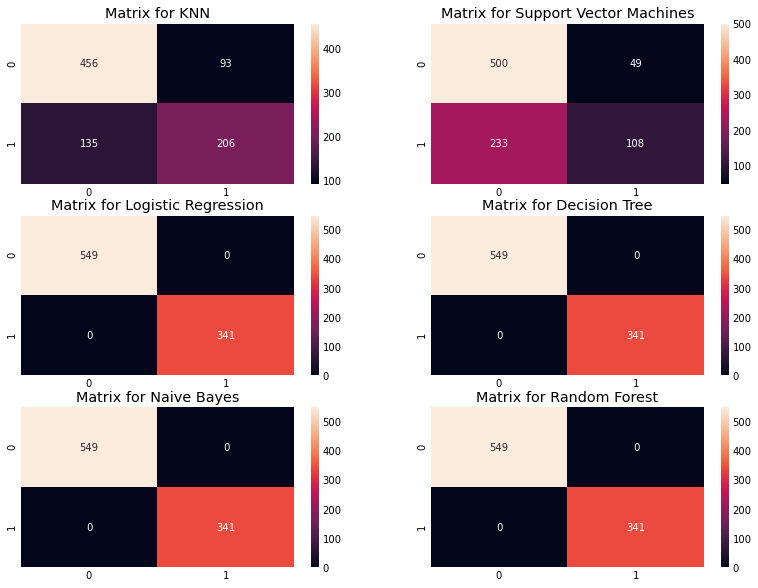

In [ ]:
f,ax=plt.subplots(3,2,figsize=(12,10))

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y, cv=103)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0],annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for KNN')

y_pred = cross_val_predict(model,X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10) 
sns.heatmap(confusion_matrix (Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(RandomForestClassifier(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,1],annot=True, fmt='2.0f')
ax[2,1].set_title('Matrix for Random Forest')

y_pred = cross_val_predict(SVC(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1],annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Support Vector Machines')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()